# MVP for Classification: Genre predicting using baseline models

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

## Data cleaning

In [163]:
# import data
df = pd.read_csv('/Users/joycetagal/Github/metis/reg/SpotifyFeatures.csv')

In [164]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [165]:
df['genre'].unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [166]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Alternative         9353
Blues               9353
Children’s Music    9353
Anime               9353
Folk                9299
Hip-Hop             9295
Rock                9272
Classical           9256
Rap                 9232
World               9096
Soul                9089
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
A Capella            119
Name: genre, dtype: int64

In [231]:
# Choose top genres to begin
mask = df['genre'].isin(['Indie', 'Jazz', 'Pop', 'Electronic', 'Alternative', 'Blues'])

In [232]:
X = df[mask].select_dtypes(exclude=['object']).copy().reset_index(drop=True)

In [233]:
X.shape

(56453, 13)

In [234]:
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,84,0.5440,0.515,209274,0.479,0.005980,3,0.1910,-7.458,1,0.0261,88.964,0.284
1,86,0.0116,0.464,239507,0.852,0.000000,11,0.1080,-3.804,1,0.0670,160.075,0.233
2,84,0.7950,0.473,209400,0.371,0.000000,4,0.1090,-10.219,0,0.0405,75.208,0.413
3,81,0.6190,0.672,174358,0.588,0.241000,1,0.0992,-9.573,1,0.1330,169.033,0.204
4,79,0.6400,0.545,248467,0.330,0.000007,1,0.2200,-11.719,0,0.1640,103.553,0.399


In [235]:
y = df[mask]['genre'].reset_index(drop=True)

In [236]:
y.shape

(56453,)

In [230]:
y.tail()

171701    Soundtrack
171702    Soundtrack
171703    Soundtrack
171704    Soundtrack
171705    Soundtrack
Name: genre, dtype: object

## Base model - begin with KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [175]:
# Split data into train and hold out
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)

In [176]:
# Split data one more time into train and eval
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [177]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(33871, 11)
(11291, 11)


In [178]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(33871,)
(11291,)


Since our features are in different scales, let's go ahead and scale the features with StandardScaler.

In [179]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
X_vl = std.transform(X_val.values)

In [180]:
# Set up KNN model with 1 nearest neighbor (less computationally intensive)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_tr, y_train)
y_pred = knn_1.predict(X_te)
print(metrics.accuracy_score(y_test, y_pred))

0.36790364006731024


In [181]:
# Set up KNN model with 5 nearest neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_tr, y_train)
y_pred = knn_5.predict(X_te)
print(metrics.accuracy_score(y_test, y_pred))

0.44309627136657515


Looks like the baseline models with K=1 and K=5 with scaled features are at between 0.36 to 0.42. Now let's use cross-validation to decide on an optimal K.

## Cross validation

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
X_trans = std.transform(X.values)

In [184]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_trans, y, cv=10, scoring='accuracy')
print(scores)

[0.41731238 0.43236662 0.43024801 0.43534101 0.42980514 0.42249779
 0.44109832 0.43467671 0.425155   0.42869796]


In [185]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.429719891962124


In [186]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31, 2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_trans, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.35979368267854556, 0.38835750504981376, 0.429719891962124, 0.4475003005082855, 0.4611620150467881, 0.469133303710635, 0.47632976141897165, 0.48241899071179384, 0.48709108567907916, 0.4910101794362915, 0.49366726095080626, 0.4956378844765754, 0.4966343219091816, 0.4988706329969276, 0.5009963589965121]


Text(0, 0.5, 'Cross-Validated Accuracy')

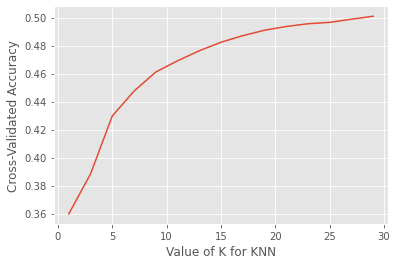

In [187]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Feature engineering

Let's replace several `object`-type features to numerical.

In [188]:
# replace key using standard pitch notation (https://en.wikipedia.org/wiki/Pitch_class)
df['key'].unique()

array(['C#', 'D#', 'C', 'D', 'G#', 'F#', 'B', 'A', 'G', 'E', 'A#', 'F'],
      dtype=object)

In [189]:
df = df.replace({'key': {'C#':1, 'D#':3, 'C':0, 'D':2, 'G#':8, 'F#':6, 'B':11, 'A':9, 'G':7, 'E':4, 'A#':10, 'F':5}})

In [190]:
# replace mode with binary (as per Spotify Web API)
# https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
df = df.replace({'mode': {'Major':1, 'Minor':0}})

In [191]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,1,0.0964,-14.287,1,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,3,0.1330,-19.794,1,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,0,0.3630,-8.415,1,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,2,0.1200,-33.440,1,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,2,0.0969,-23.625,1,0.0493,172.935,4/4,0.0382


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  int64  
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  int64  
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [203]:
X = df[mask].select_dtypes(exclude=['object']).copy().reset_index(drop=True)
y = df[mask]['genre'].reset_index(drop=True)

In [216]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [205]:
std = StandardScaler()
std.fit(X.values)
X = std.transform(X.values)

In [206]:
# Split data into train and hold out
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)

In [207]:
# Split data one more time into train and eval
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [208]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(33871, 13)
(11291, 13)


Note that we now have 13 features (including the key and mode), whereas previously we had only 11.

Since the previous cross-validation showed that the higher the number of K neighbors, the more accurate the model, let's go ahead and choose 31 for our K.

In [209]:
# Set up KNN model with 31 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for kNN is
Training:  54.88%
Test set:  49.26%


The accuracy score has increased to 0.49. Let's look at other metrics.

In [210]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

In [211]:
y_test.unique()

array(['Pop', 'Jazz', 'Electronic', 'Blues', 'Indie', 'Alternative'],
      dtype=object)

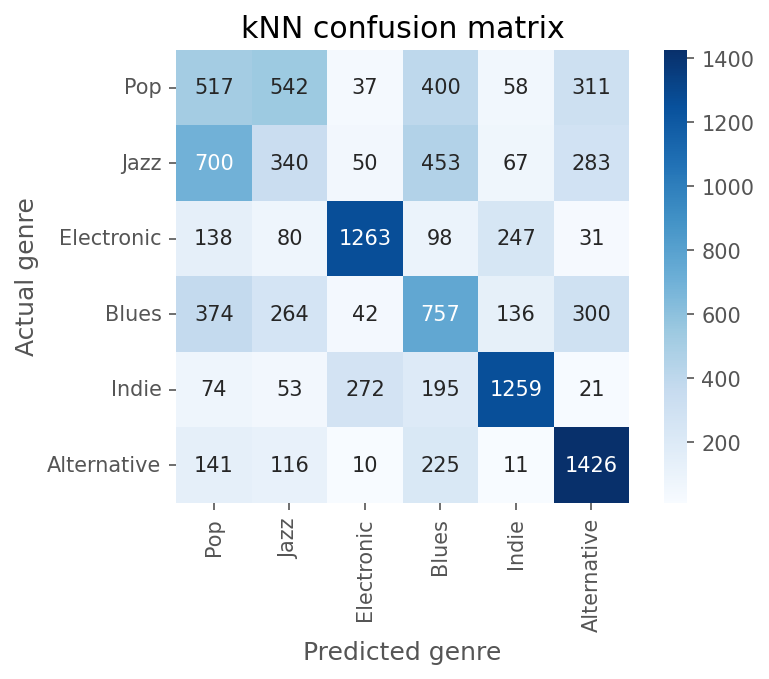

In [212]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, 
            cmap=plt.cm.Blues, 
            annot=True, 
            square=True, 
            fmt='g', 
            xticklabels=y_test.unique(), 
            yticklabels=y_test.unique()
           )
plt.xlabel('Predicted genre')
plt.ylabel('Actual genre')
plt.title('kNN confusion matrix');

In [213]:
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, knn.predict(X_test), average='macro'), 
                                                     recall_score(y_test, knn.predict(X_test), average='macro')))

Default threshold:
Precision: 0.4882,   Recall: 0.4920


In [214]:
# Take a closer look at wrong predictions
y_pred = knn.predict(X_test)

In [217]:
combined = pd.concat(
    [pd.DataFrame(X_test).reset_index(drop=True), 
     pd.DataFrame(y_test).reset_index(drop=True), 
     pd.DataFrame(y_pred).reset_index(drop=True)], 
    axis=1, ignore_index=True)

In [218]:
combined.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.741588,-0.812012,0.609277,-0.311400,1.452798,-0.526010,0.756124,0.953832,1.447104,0.801119,-0.277504,-0.456608,0.505037,Pop,Alternative
1,-1.619795,1.650256,-0.842239,1.803873,-0.834554,-0.524055,1.591139,-0.785216,-0.068627,0.801119,-0.619939,0.733805,-0.668463,Jazz,Jazz
2,-2.406922,-0.722403,0.813808,0.209508,1.068629,-0.525929,-0.913908,2.053154,0.871450,-1.248254,-0.575754,0.569912,2.105657,Electronic,Electronic
3,0.111886,0.177364,0.391549,0.257139,-1.271712,-0.526010,1.312801,-0.624291,-1.261545,-1.248254,1.420310,-1.051422,-0.754750,Blues,Alternative
4,-1.383656,-0.570772,-1.211716,-0.553940,1.240843,-0.520350,0.477785,4.761724,2.214643,0.801119,-0.417792,-0.348305,-0.526090,Electronic,Alternative


In [221]:
combined = combined.rename(columns = {0:"popularity", 1: "acousticness", 2: "danceability", 
                           3:"duration_ms", 4: "energy", 5: "instrumentalness", 6: "key",
                           7: "liveness", 8: "loudness", 9: "mode", 10:"speechiness", 
                           11: "tempo", 12: "valence", 13:'y_test', 14:'y_pred'})

In [222]:
combined.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,y_test,y_pred
0,0.741588,-0.812012,0.609277,-0.311400,1.452798,-0.526010,0.756124,0.953832,1.447104,0.801119,-0.277504,-0.456608,0.505037,Pop,Alternative
1,-1.619795,1.650256,-0.842239,1.803873,-0.834554,-0.524055,1.591139,-0.785216,-0.068627,0.801119,-0.619939,0.733805,-0.668463,Jazz,Jazz
2,-2.406922,-0.722403,0.813808,0.209508,1.068629,-0.525929,-0.913908,2.053154,0.871450,-1.248254,-0.575754,0.569912,2.105657,Electronic,Electronic
3,0.111886,0.177364,0.391549,0.257139,-1.271712,-0.526010,1.312801,-0.624291,-1.261545,-1.248254,1.420310,-1.051422,-0.754750,Blues,Alternative
4,-1.383656,-0.570772,-1.211716,-0.553940,1.240843,-0.520350,0.477785,4.761724,2.214643,0.801119,-0.417792,-0.348305,-0.526090,Electronic,Alternative


In [223]:
combined['diff'] = np.where(df['y_test'] != df['y_pred'], 'Positive', 'Negative')

(11291, 15)